<left> <h1> <center> Project 2: Training Neural Networks using Non Linear Least Squares </center> </h1> </left>

## Neural Network Definition
We consider a neural network that approximates a non-linear function $g(\textbf{x})$ to be a function of the form:
$$\hat{y} = f_w (\textbf{x}) = w_1 \phi(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) + w_6 \phi(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) + w_{11} \phi (w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) + w_{16} \quad$$ 
Where the scalar output is $\hat{y} \in \mathbb{R}$, the vector input is $\textbf{x} \in \mathbb{R}^3$, and the weights that parametrize the network are $\textbf{w} \in \mathbb{R}^{16}$ and $\phi$: $\mathbb{R} \rightarrow \mathbb{R}$  is defined as:
$$\phi(\textbf{x}) = \tanh(\textbf{x}) = \frac{e^\textbf{x} - e^{-\textbf{x}}}{e^\textbf{x} + e^{-\textbf{x}}} \qquad \text{(The hyperbolic tan function)}$$

## Non-linear Least Squares Objective
The goal is to determine the weights $w_1, ... w_{16}$ that best approximate a non-linear function $g(\textbf{x})$ by minimizing the sum of squared errors, defined as:
$$\sum_{n=1}^N (f_w(\textbf{x}^{(n)}) - y^{(n)})^2 = \sum_{n=1}^N r_n(w)^2$$
Where $y^{(n)}$ is the output of $g(\textbf{x})$ for the vector input $x^{(n)}$. 

## <center> Part 1 </center>
 The gradient of $f_w(\textbf{x})$ is given by:

$$
\nabla_w f_w(\textbf{x}) = 
\begin{bmatrix}
\frac{\partial}{\partial w_1}f_w(\textbf{x}) \\
\frac{\partial}{\partial w_2}f_w(\textbf{x}) \\
\vdots \\
\frac{\partial}{\partial w_{16}} f_w(\textbf{x})
\end{bmatrix}
=
\begin{bmatrix}
\phi(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) x_1 \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) x_2 \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) x_3 \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) \\
\phi(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) x_1 \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) x_2 \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) x_3 \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) \\
\phi(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) x_1 \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) x_2 \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) x_3 \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) \\
1
\end{bmatrix}
$$
Where $\phi'(x) = \frac{d}{dx} \bigg( \frac{e^x -e^{-x}}{e^x+e^{-x}} \bigg) = \frac{4e^{2x}}{(e^{2x}+1)^2}$

## <center> Part 2 </center>
$$\textbf{r}(w) = \big[ r_1 \quad r_2\quad ...\quad r_N \big] = \big[ f_w(\textbf{x}^{(1)}) - y^{(1)}\quad f_w(\textbf{x}^{(2)}) - y^{(2)} \quad ... \quad f_w(\textbf{x}^{(N)}) - y^{(N)} \big] $$
The gradient of the sum of squared error is:
$$\nabla_w \parallel \textbf{r}(w) \parallel^2 = \nabla_w \bigg( \sum_{n=1}^N r_n(w)^2 \bigg) = 2 \sum_{n=1}^N r_n(w) \dot \nabla_w r_n(w) \quad \text{(using the chain rule)} $$
Which can be rewritten as:
$$2(r_1(w)\nabla_w r_1(w) + r_2(w)\nabla_w r_2(w) + ... + r_N(w)\nabla_w r_N(w)) = 2 \big[\nabla_w r_1(w) \quad \nabla_w r_2(w)  \quad ... \quad \nabla_w r_N(w)\big] \begin{bmatrix}
r_1(w)\\
r_2(w)\\
\vdots\\
r_N(w)
\end{bmatrix}$$

$$ = 2 \begin{bmatrix}
\nabla_w r_1(w)\\
\nabla_w r_1(w)\\
\vdots \\
\nabla_w r_1(w)
\end{bmatrix}^T \begin{bmatrix}
r_1(w)\\
r_2(w)\\
\vdots\\
r_N(w)
\end{bmatrix} = 2 \textbf{Dr}(w)^T\textbf{r}(w), \quad \text{where} \: \:\textbf{Dr}(w) = \begin{bmatrix}
\nabla_w r_1(w)\\
\nabla_w r_2(w)\\
\vdots \\
\nabla_w r_N(w)
\end{bmatrix} = \begin{bmatrix}
\nabla_w f_w(x^{(1)})\\
\nabla_w f_w(x^{(2)})\\
\vdots \\
\nabla_w f_w(x^{(N)})
\end{bmatrix}$$
The last step is due to the fact that $r_n(w)$ is defined as $y^{(n)} - f_w(x^{(n)})$ which means $\nabla_w r_n(w) = \nabla_w f_w(x^{(n)})$, since $y^{(n)}$ is not a function of $w$.

## <center> Part 3 </center>

The training data for the neural network to approximate the non-linear function $g(\textbf{x}) = x_1 x_2 + x_3$ will consist of $N=500$ randomly generated points, $\mathbf{x}^{(n)} = \begin{bmatrix} x_1^{(n)} \\ x_2^{(n)} \\ x_3^{(n)} \end{bmatrix} \in \mathbb{R}^3$, such that max$ \{ |x_1^{(n)}|,|x_2^{(n)}|,|x_3^{(n)}| \} \leq \Gamma = 1$ for all $n = 1,2,...,N$.

The training pairs $\big(\textbf{x}^{(n)}, y^{(n)} \big) _{n=1}^N$ will be used to minimize the training loss with respect to $\textbf{w}$, $l(\textbf{w}) = \sum_{n=1}^N r_n^2(\textbf{w}) + \lambda \parallel \textbf{w} \parallel^2_2$
The training data $\textbf{x}$ and $y$ is generated below. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Generates num training points x_1, x_2, x_3 in R^3 between -gamma and +gamma and y = function(x_1, x_2, x_3)
def random_data(num = 500, gamma = 1, function = lambda x_1, x_2, x_3: x_1*x_2 + x_3):
    x_train = []
    y_train = np.empty((0,))
    for i in range(num):
        x_1 = np.random.uniform(-gamma, gamma)
        x_2 = np.random.uniform(-gamma, gamma)
        x_3 = np.random.uniform(-gamma, gamma)
        x_train.append([x_1, x_2, x_3])
        y_train = np.append(y_train, function(x_1, x_2, x_3))
    return np.array(x_train), y_train

### Levenberg-Marquardt algorithm
The Levenberg-Marquardt algorithm is a variation of the Gauss-Newton algorithm and addresses the issue of the algorithm diverging when the estimated points get further and further away. The algorithm to solve for $w$, the correct weights to approximate $g(\textbf{x})$ is as follows:
1. The *affine approximation* at the current iterate is calculated by first order Taylor Approximation given by:
$$r(w;w^{(k)}) = r(w^{(k)}) + \textbf{D}r(w^{(k)})(w-w^{(k)})$$
2.  Next, the *tentative iterate*, $w^{(k+1)}$ minimizes $\parallel r(w;w^{(k)})\parallel^2 + \lambda^{(k)}\parallel w-w^{(k)}\parallel ^2 $. $w^{(k+1)}$ is given by:
$$w^{(k+1)} = w^{(k)} - \big( \textbf{D}r(w^{(k)})^T \textbf{D}r(w^{(k)}) + \lambda ^{(k)} I \big)^{-1}\textbf{D}r(w^{(k)})^T r(w^{(k)})]$$
3. Finally, the *tentative iterate* is checked against the previous one. If $\parallel r(w^{(k+1)}) \parallel ^2 < \parallel r(w^{(k)}) \parallel^2$, $w^{(k+1)}$ is accepted and $\lambda^{(k+1)} = .8\lambda^{(k)}$. Otherwise, $w^{(k+1)} = w^{(k)}$ and $\lambda^{(k+1)} = 2\lambda^{(k)}$.

The algorithm terminates when either terms $\parallel r(w^{(k+1)} \parallel ^2$ or $\parallel 2\textbf{D}r(w^{(k+1)})^T r(w^{(k+1)}) \parallel$ are small enough.



### Implementation

In [246]:
# exception for when the algorithm has converged
class StopIteration(Exception):
    def __init__(self, message = "The algorithm has converged."):
        self.message = message
        super().__init__(self.message)

# f_w(x), the estimate of y given xn=[x_1, x_2, x_3] and w = [w_1 ... w_16]
def f_w(x, w):
    x_1, x_2, x_3 = x
    w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9, w_10, w_11, w_12, w_13, w_14, w_15, w_16 = w
    return w_1*np.tanh(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5) + w_6*np.tanh(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10) + w_11*np.tanh(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15) + w_16

# vector of f_w(x) for all x in training data
def f_w_vec(x, w):
    y = np.empty((0,))
    for x_n in x:
        y = np.append(y, f_w(x_n, w))
    return y

# derivative of tanh(x)
def tanh_p(x):
    e = np.exp(1)
    return (4 * e ** (2 * x)) / ((e ** (2 * x) + 1) ** 2)

# gradient of f_w(x) with respect to w
def nabla_f_w(x, w):
    x_1, x_2, x_3 = x
    w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9, w_10, w_11, w_12, w_13, w_14, w_15, w_16 = w
    return np.array([np.tanh(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5), w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5)*x_1, w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5)*x_2, w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5)*x_3, w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5), np.tanh(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10), w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10)*x_1, w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10)*x_2, w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10)*x_3, w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10), np.tanh(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15), w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15)*x_1, w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15)*x_2, w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15)*x_3, w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15), 1])

# gradient of r_n(w) with respect to w (same as nabla_f_w(x, w), implemented for clarity)
def nabla_r_n(x, w):
    return nabla_f_w(x, w) 

# derivative matrix of r_n(w) for all x in training data, made up of stacked gradients
def dr_w_matrix(x, w):
    mat = np.empty((0,16))
    for x_n in x:
        mat = np.vstack((mat, nabla_r_n(x_n, w)))
    return mat

# find the next iterate of w given the current iterate w_k, the training data x, y, and l (lambda). Also returns the new lambda. 
# raises StopIteration if the algorithm has converged.
def next_iterate(last_iterate, x, y, l, num_iter, max_iter, stop = .02):
    w_k = last_iterate
    dr = dr_w_matrix(x, w_k)
    f_w = f_w_vec(x, w_k)
    r = f_w - y
    w_k_1 = w_k - np.linalg.inv(dr.T @ dr + l*np.identity(16)) @ dr.T @ r # next iterate
    r_1 = f_w_vec(x, w_k_1) - y

    if np.inner(r_1.T, r_1) < stop or num_iter >= max_iter: # check if algorithm has converged
        raise StopIteration
    elif np.linalg.norm(r_1)**2 < np.linalg.norm(r)**2: # check if next iterate is better
        return w_k_1, .8*l
    else:
        return w_k, 2*l
    
# training loss with respect to weights w, given training data (x,y) and l (lambda) for the iterate
def training_loss(w, x, y, l):
    loss = 0
    return np.inner((f_w_vec(x,w) - y), (f_w_vec(x,w) - y)) + l*np.linalg.norm(w)**2


In [245]:
def make_weights(x_train, y_train, l = .00001, weights_initial = np.random.normal(0, 1, 16)):
    loss = []
    num_iter = 0
    w = weights_initial
    best_w = w
    best_loss = training_loss(w, x_train, y_train, l)
    while True:
        try:
            w, l = next_iterate(w, x_train, y_train, l, num_iter, max_iter = 1000)
            loss.append(training_loss(w, x_train, y_train, l))
            if loss[-1] < best_loss:
                best_w = w
                best_loss = loss[-1]
        except StopIteration:
            break
        except KeyboardInterrupt:
            break
        num_iter += 1    
            
    return (best_w, loss)

### (a) 

The network will be trained for $g(\textbf{x}) = x_1 x_2 + x_3$ using randomly generated $(\textbf{x}^{(n)}, y^{(n)})_{n=1}^N$, where each element $|x_i^{(n)}| \leq \Gamma$ for $i = 1,2,3$ and $y^{(n)} = g(x^{(n)})$. $\Gamma = 1$, and $N = 500$. The algorithm stops when any of the following are met:
- $\parallel r(w^{(k+1)} \parallel ^2 < .02$ 
- Number of iterations = 1000

Weights will be generated with 3 different initializations for each $\lambda = 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}$. Each $\lambda$ will have 3 random sets of weights generated according to different normal distributions:
- $N(0,1)$
- $N(0,.5)$
- $N(0,2)$


In [69]:
# Training data
x, y = random_data(num = 500, gamma = 1, function = lambda x_1, x_2, x_3: x_1*x_2 + x_3)

In [247]:
weights_2, loss_2 = make_weights(x_train = x, y_train = y, l = .01)
weights_21, loss_21 = make_weights(x_train = x, y_train = y, l = .01, weights_initial = np.random.normal(0, .5, 16))
weights_22, loss_22 = make_weights(x_train = x, y_train = y, l = .01, weights_initial = np.random.normal(0, 2, 16))

In [90]:
weights_3, loss_3 = make_weights(x_train = x, y_train = y, l = .001)
weights_31, loss_31 = make_weights(x_train = x, y_train = y, l = .001, weights_initial = np.random.normal(0, .5, 16))
weights_32, loss_32 = make_weights(x_train = x, y_train = y, l = .001, weights_initial = np.random.normal(0, 2, 16))

In [88]:
weights_4, loss_4 = make_weights(x_train = x, y_train = y, l = .0001)
weights_41, loss_41 = make_weights(x_train = x, y_train = y, l = .0001, weights_initial = np.random.normal(0, .5, 16))
weights_42, loss_42 = make_weights(x_train = x, y_train = y, l = .0001, weights_initial = np.random.normal(0, 2, 16))

In [82]:
weights_5, loss_5 = make_weights(x_train = x, y_train = y, l = .00001)
weights_51, loss_51 = make_weights(x_train = x, y_train = y, l = .00001, weights_initial = np.random.normal(0, .5, 16))
weights_52, loss_52 = make_weights(x_train = x, y_train = y, l = .00001, weights_initial = np.random.normal(0, 2, 16))

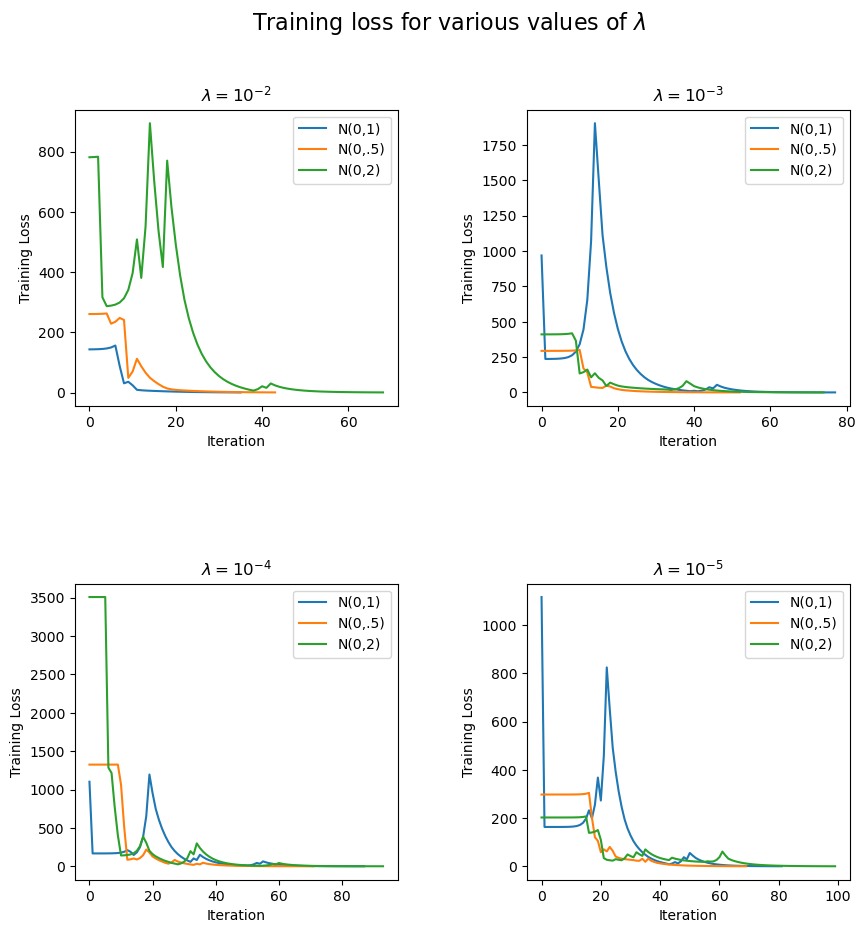

In [248]:
# add all the losses to the graph
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(loss_2, label = "N(0,1)")
plt.plot(loss_21, label = "N(0,.5)")
plt.plot(loss_22, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-2}$")
plt.legend()    
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,2)
plt.plot(loss_3, label = "N(0,1)")
plt.plot(loss_31, label = "N(0,.5)")
plt.plot(loss_32, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-3}$")
plt.legend()    
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,3)
plt.plot(loss_4, label = "N(0,1)")
plt.plot(loss_41, label = "N(0,.5)")
plt.plot(loss_42, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-4}$")
plt.legend()    
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,4)
plt.plot(loss_5, label = "N(0,1)")
plt.plot(loss_51, label = "N(0,.5)")
plt.plot(loss_52, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-5}$")
plt.legend()    
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.suptitle('Training loss for various values of $\lambda$', fontsize=16);

It's evident from the plots above that the choice of $\lambda$ as well as the initialization of the algorithm affects the training loss. $\lambda = 10^{-2}$ seems to be the fastest choice for $\lambda$ as it converges the fastest, especially when the weights were initialized to smaller values. However, besides $10^{-2}$ had the worst loss after convergence. All other $\lambda$ values reached roughly the same loss after a sufficient number of iterations. The weights initialized according to the distribution $N(0,.5)$ converged the fastest on average while the weights initialized according to $N(0,2)$ were the slowest to converge, but the initializations did not have much effect on the final loss. The results are summarized below:

In [249]:
print("Different lambdas:")
print("Average training loss for lambda = 10^-2: ", round((loss_2[-1] + loss_21[-1] + loss_22[-1])/3,2), ". Achieved in an average of ", round((len(loss_2) + len(loss_21) + len(loss_22))/3,2), " iterations.")
print("Average training loss for lambda = 10^-3: ", round((loss_3[-1] + loss_31[-1] + loss_32[-1])/3,2), ". Achieved in an average of ", round((len(loss_3) + len(loss_31) + len(loss_32))/3,2), " iterations.")
print("Average training loss for lambda = 10^-4: ", round((loss_4[-1] + loss_41[-1] + loss_42[-1])/3,2), ". Achieved in an average of ", round((len(loss_4) + len(loss_41) + len(loss_42))/3,2), " iterations.")
print("Average training loss for lambda = 10^-5: ", round((loss_5[-1] + loss_51[-1] + loss_52[-1])/3,2), ". Achieved in an average of ", round((len(loss_5) + len(loss_51) + len(loss_52))/3,2), "  iterations.")
print()
print("Different initializations:")
print("Average training loss for weights initialized according to N(0,.5):", round((loss_21[-1] + loss_31[-1] + loss_41[-1] + loss_51[-1])/4,2), ". Achieved in an average of ", round((len(loss_21) + len(loss_31) + len(loss_41) + len(loss_51))/4,2), " iterations.")
print("Average training loss for weights initialized according to N(0,1): ", round((loss_2[-1] + loss_3[-1] + loss_4[-1] + loss_5[-1])/4,2), ". Achieved in an average of ", round((len(loss_2) + len(loss_3) + len(loss_4) + len(loss_5))/4,2), "  iterations.")
print("Average training loss for weights initialized according to N(0,2): ", round((loss_22[-1] + loss_32[-1] + loss_42[-1] + loss_52[-1])/4,2), " . Achieved in an average of ", round((len(loss_22) + len(loss_32) + len(loss_42) + len(loss_52))/4,2), "  iterations.")

Different lambdas:
Average training loss for lambda = 10^-2:  0.44 . Achieved in an average of  49.67  iterations.
Average training loss for lambda = 10^-3:  0.32 . Achieved in an average of  68.67  iterations.
Average training loss for lambda = 10^-4:  0.31 . Achieved in an average of  84.67  iterations.
Average training loss for lambda = 10^-5:  0.31 . Achieved in an average of  84.0   iterations.

Different initializations:
Average training loss for weights initialized according to N(0,.5): 0.35 . Achieved in an average of  59.75  iterations.
Average training loss for weights initialized according to N(0,1):  0.35 . Achieved in an average of  71.0   iterations.
Average training loss for weights initialized according to N(0,2):  0.33  . Achieved in an average of  84.5   iterations.


### (b)

I'll generate sets of $N_T$ = 100 randomly generated points, $\{ \tilde{\textbf{x}}^{(1)}, \tilde{\textbf{x}}^{(2)}, ..., \tilde{\textbf{x}}^{(N_T)} \} \in \mathbb{R}^3$ such that $\text{max}\{|\tilde{x}_1^{(n)}|, |\tilde{x}_2^{(n)}|, |\tilde{x}_3^{(n)}|\} \leq \Gamma_T$ for all $n = 1,2,...,N_T$ for $\Gamma_T =$ 0.5, 0.75, 1, 1.25, and 1.5 .




One call of the function below will generate 5 sets of 100 data points (in $\mathbb{R}^3$), one set for each $\Gamma_T$ = .5, .75, 1, 1.25, 1.5, meaning a 5 x 100 x 3 array of data points between $-\Gamma_T$ and $+\Gamma_T$.

In [117]:
def calc_rand_test(num, gammas, function):
    x_test = []
    y_test = []
    for gamma in gammas:
        x, y = random_data(num = num, gamma = gamma, function = function)
        x_test.append(x)
        y_test.append(y)
    return np.array(x_test), np.array(y_test)

To test the model, I'll calculate the sum of squared error between the predicted value, $f_w(x)$ and the actual value output of the function, $g(x)$ for each $\tilde{\textbf{x}}^{(n)}$ in the test set and the set of weights generated for each $\lambda = 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}$. The sum of squared error is defined as: $$\sum_{n = 1}^{100}(f_w(\tilde{\textbf{x}}^{(n)}) - g(\tilde{\textbf{x}}^{(n)}))^2$$
I'll calculate the sum of squared error for a set of 100 points for each $\Gamma_T =$ 0.5, 0.75, 1, 1.25, and 1.5 (5 sets total), and each set of weights generated in (a), for a total of 5 * 12 = 60 calculated squared errors. I'll seperate the data based on the initialization of the algorithm ($N(0,1)$, $N(0,.5)$, $N(0,2)$).

In [138]:
def squared_error(x, y, w):
    return np.inner((f_w_vec(x, w) - y), (f_w_vec(x, w) - y))

test_x, test_y = calc_rand_test(100, [.5, .75, 1, 1.25, 1.5], lambda x_1, x_2, x_3: x_1*x_2 + x_3)
weights_05 = [weights_2, weights_3, weights_4, weights_5]
weights_01 = [weights_21, weights_31, weights_41, weights_51]
weights_02 = [weights_22, weights_32, weights_42, weights_52]
error_05 = []
error_01 = []
error_02 = []
for i in range(4):
    e05 = []
    e01 = []
    e02 = []
    for j in range(5):
        e05.append(squared_error(test_x[j], test_y[j], weights_05[i]))
        e01.append(squared_error(test_x[j], test_y[j], weights_01[i]))
        e02.append(squared_error(test_x[j], test_y[j], weights_02[i]))
    error_05.append(e05)
    error_01.append(e01)
    error_02.append(e02) 

The results are summarized in the tables below, one for each initialization of the algorithm

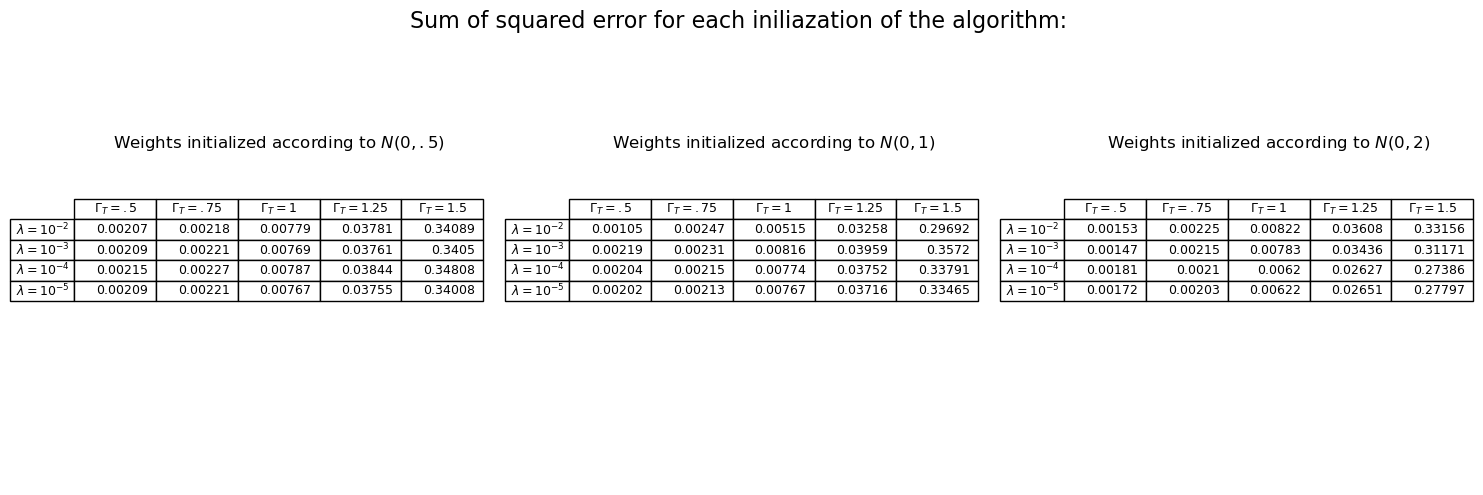

In [172]:
columns = ["$\Gamma_T = .5$", "$\Gamma_T = .75$", "$\Gamma_T = 1$", "$\Gamma_T = 1.25$", "$\Gamma_T = 1.5$"]
rows = ["$\lambda = 10^{-2}$", "$\lambda = 10^{-3}$", "$\lambda = 10^{-4}$", "$\lambda = 10^{-5}$"]
error_05 = np.array(error_05)
error_01 = np.array(error_01)
error_02 = np.array(error_02)
error_05 = np.round(error_05, 5)
error_01 = np.round(error_01, 5)
error_02 = np.round(error_02, 5)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].axis('tight')
ax[0].axis('off')
ax[0].table(cellText=error_05, rowLabels=rows, colLabels=columns, loc='center')
ax[0].set_title("Weights initialized according to $N(0,.5)$", y= .7)

ax[1].axis('tight')
ax[1].axis('off')
ax[1].table(cellText=error_01, rowLabels=rows, colLabels=columns, loc='center')
ax[1].set_title("Weights initialized according to $N(0,1)$", y= .7)

ax[2].axis('tight')
ax[2].axis('off')
ax[2].table(cellText=error_02, rowLabels=rows, colLabels=columns, loc='center')
ax[2].set_title("Weights initialized according to $N(0,2)$", y= .7)

plt.tight_layout()
fig.suptitle("Sum of squared error for each initialization of the algorithm:", fontsize=16)
plt.show()

The initialization doesn't appear to have much effect on the results; the results in each table are very similar to eachother. However, the $\Gamma_T$ has a dramatic effect on the squared error. Generally, a smaller value of $\Gamma_T$ yielded smaller squared error. This makes sense, the model was trained on data subject to $\Gamma_T = 1$, so values in the test data larger than the training $\Gamma_T$ can produce  unpredictable results. The sum of squared error for $\Gamma_T = 1.25$ and $\Gamma_T = 1.5$ were much larger than the other values of $\Gamma_T$. This is likely because the first term of function $g(\textbf{x}) = x_1 x_2 + x_3$ behaves a bit differently when $x_1$ and $x_2$ are larger than 1, i.e., the function starts to grow much faster. For example, on one extreme, if $x_1 = x_2 = x_3 = 1.5$, $g(\textbf{x}) = 3.375$. However, the largest possible value of $g(\textbf{x})$ for the training data was 2, when $x_1 = x_2 = x_3 = 1$. Since the model is a linear approximation, it's very hard for it to predict large jumps like this. 

### (c)
Here, I'll use the function $g(\textbf{x}) = e^{x_1 + x_2 + x_3}$. I'll repeat the exact same procedure from parts (a) and (b), making most of my code reusable once I change instances of $x_1 x_2 + x_3$ to $e^{x_1 + x_2 + x_3}$. All the code derived from parts 1 and 2 is reusable because it makes no assumptions about the function $g(x)$.

First, calculating training loss on the random training data: 

In [211]:
# Training data
cx, cy = random_data(num = 500, gamma = 1, function = lambda x_1, x_2, x_3: np.exp(x_1 + x_2 + x_3))

In [224]:
cweights_2, closs_2 = make_weights(x_train = cx, y_train = cy, l = .01)
cweights_21, closs_21 = make_weights(x_train = cx, y_train = cy, l = .01, weights_initial = np.random.normal(0, .5, 16))
cweights_22, closs_22 = make_weights(x_train = cx, y_train = cy, l = .01, weights_initial = np.random.normal(0, 2, 16))

In [230]:
cweights_3, closs_3 = make_weights(x_train = cx, y_train = cy, l = .001)
cweights_31, closs_31 = make_weights(x_train = cx, y_train = cy, l = .001, weights_initial = np.random.normal(0, .5, 16))
cweights_32, closs_32 = make_weights(x_train = cx, y_train = cy, l = .001, weights_initial = np.random.normal(0, 2, 16))

In [228]:
cweights_4, closs_4 = make_weights(x_train = cx, y_train = cy, l = .0001)
cweights_41, closs_41 = make_weights(x_train = cx, y_train = cy, l = .0001, weights_initial = np.random.normal(0, .5, 16))
cweights_42, closs_42 = make_weights(x_train = cx, y_train = cy, l = .0001, weights_initial = np.random.normal(0, 2, 16))

In [238]:
cweights_5, closs_5 = make_weights(x_train = cx, y_train = cy, l = .00001)
cweights_51, closs_51 = make_weights(x_train = cx, y_train = cy, l = .00001, weights_initial = np.random.normal(0, .5, 16))
cweights_52, closs_52 = make_weights(x_train = cx, y_train = cy, l = .00001, weights_initial = np.random.normal(0, 2, 16))

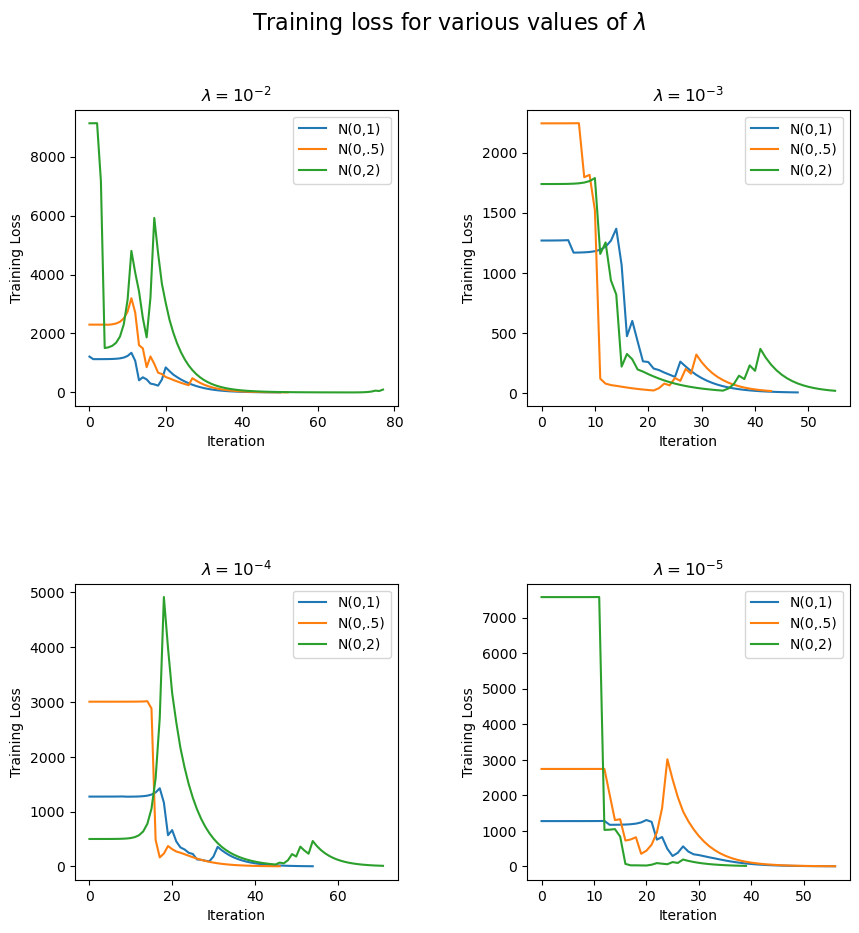

In [250]:
# add all the losses to the graph
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(closs_2, label = "N(0,1)")
plt.plot(closs_21, label = "N(0,.5)")
plt.plot(closs_22, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-2}$")
plt.legend()    
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,2)
plt.plot(closs_3, label = "N(0,1)")
plt.plot(closs_31, label = "N(0,.5)")
plt.plot(closs_32, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-3}$")
plt.legend()    
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,3)
plt.plot(closs_4, label = "N(0,1)")
plt.plot(closs_41, label = "N(0,.5)")
plt.plot(closs_42, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-4}$")
plt.legend()    
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,4)
plt.plot(closs_5, label = "N(0,1)")
plt.plot(closs_51, label = "N(0,.5)")
plt.plot(closs_52, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-5}$")
plt.legend()    
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.suptitle('Training loss for various values of $\lambda$', fontsize=16);

It's evident from the plots above that the choice of $\lambda$ as well as the initialization of the algorithm affects the training loss. $\lambda = 10^{-3}$ seems to be the fastest choice for $\lambda$ as it converges the fastest, especially when the weights were initialized to smaller values. However, besides $10^{-2}$ which had the worst loss after convergence. All other $\lambda$ values reached similar the same loss after a sufficient number of iterations, with $\lambda = 10^{-4}$ being th ebest. The weights initialized according to the distribution $N(0,.5)$ converged the fastest on average while the weights initialized according to $N(0,2)$ were the slowest to converge, and $N(0,.5)$ had the best training loss, while $N(0,2)$ had the worst loss. The results are summarized below:

In [255]:
print("Different lambdas:")
print("Average training loss for lambda = 10^-2: ", round((closs_2[-1] + closs_21[-1] + closs_22[-1])/3,2), ". Achieved in an average of ", round((len(closs_2) + len(closs_21) + len(closs_22))/3,2), " iterations.")
print("Average training loss for lambda = 10^-3: ", round((closs_3[-1] + closs_31[-1] + closs_32[-1])/3,2), ". Achieved in an average of ", round((len(closs_3) + len(closs_31) + len(closs_32))/3,2), " iterations.")
print("Average training loss for lambda = 10^-4: ", round((closs_4[-1] + closs_41[-1] + closs_42[-1])/3,2), ".  Achieved in an average of ", round((len(closs_4) + len(closs_41) + len(closs_42))/3,2), "  iterations.")
print("Average training loss for lambda = 10^-5: ", round((closs_5[-1] + closs_51[-1] + closs_52[-1])/3,2), ".  Achieved in an average of ", round((len(closs_5) + len(closs_51) + len(closs_52))/3,2), "  iterations.")
print()
print("Different initializations:")
print("Average training loss for weights initialized according to N(0,.5):", round((closs_21[-1] + closs_31[-1] + closs_41[-1] + closs_51[-1])/4,2), " . Achieved in an average of ", round((len(closs_21) + len(closs_31) + len(closs_41) + len(closs_51))/4,2), " iterations.")
print("Average training loss for weights initialized according to N(0,1): ", round((closs_2[-1] + closs_3[-1] + closs_4[-1] + closs_5[-1])/4,2), "  . Achieved in an average of ", round((len(closs_2) + len(closs_3) + len(closs_4) + len(closs_5))/4,2), "  iterations.")
print("Average training loss for weights initialized according to N(0,2): ", round((closs_22[-1] + closs_32[-1] + closs_42[-1] + closs_52[-1])/4,2), ". Achieved in an average of ", round((len(closs_22) + len(closs_32) + len(closs_42) + len(closs_52))/4,2), "  iterations.")


Different lambdas:
Average training loss for lambda = 10^-2:  34.61 . Achieved in an average of  60.67  iterations.
Average training loss for lambda = 10^-3:  11.65 . Achieved in an average of  49.67  iterations.
Average training loss for lambda = 10^-4:  5.96 .  Achieved in an average of  58.0   iterations.
Average training loss for lambda = 10^-5:  7.04 .  Achieved in an average of  51.33   iterations.

Different initializations:
Average training loss for weights initialized according to N(0,.5): 6.31  . Achieved in an average of  50.25  iterations.
Average training loss for weights initialized according to N(0,1):  3.3   . Achieved in an average of  53.0   iterations.
Average training loss for weights initialized according to N(0,2):  34.84 . Achieved in an average of  61.5   iterations.


To test the model, I'll use the same procedure as in part (b):

In [272]:
# test data
ctest_x, ctest_y = calc_rand_test(100, [.5, .75, 1, 1.25, 1.5], lambda x_1, x_2, x_3: np.exp(x_1 + x_2 + x_3))
cweights_05 = [cweights_2, cweights_3, cweights_4, cweights_5]
cweights_01 = [cweights_21, cweights_31, cweights_41, cweights_51]
cweights_02 = [cweights_22, cweights_32, cweights_42, cweights_52]
cerror_05 = []
cerror_01 = []
cerror_02 = []
for i in range(4):
    e05 = []
    e01 = []
    e02 = []
    for j in range(5):
        e05.append(squared_error(ctest_x[j], ctest_y[j], cweights_05[i]))
        e01.append(squared_error(ctest_x[j], ctest_y[j], cweights_01[i]))
        e02.append(squared_error(ctest_x[j], ctest_y[j], cweights_02[i]))
    cerror_05.append(e05)
    cerror_01.append(e01)
    cerror_02.append(e02) 

As in part (b), the results are summarized in the tables below, one for each initialization of the algorithm.

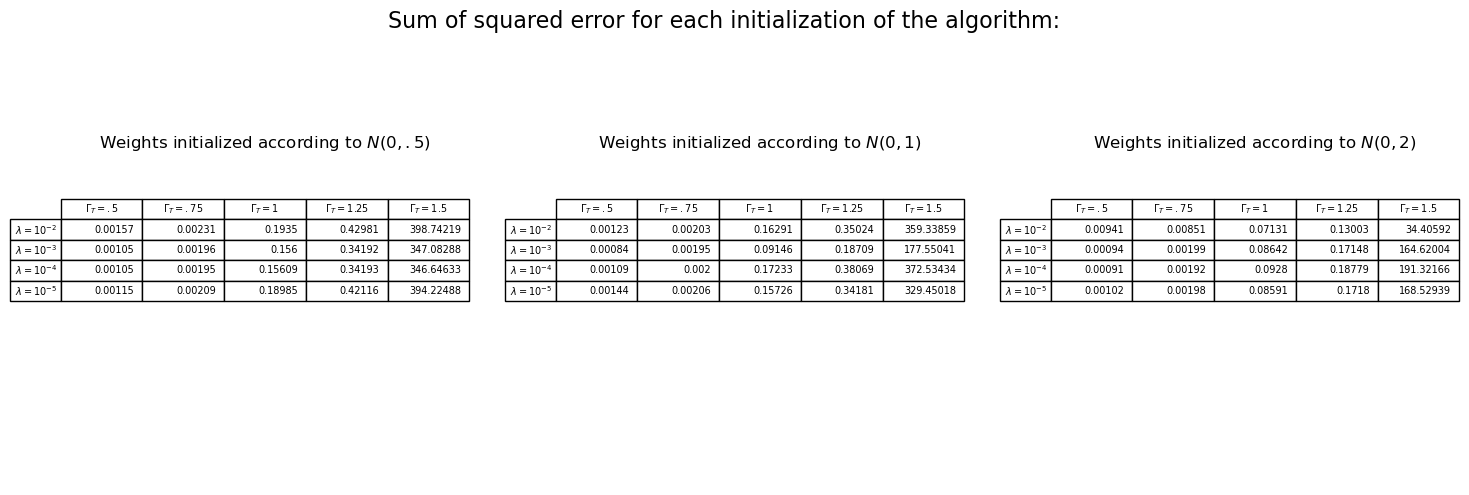

In [274]:
columns = ["$\Gamma_T = .5$", "$\Gamma_T = .75$", "$\Gamma_T = 1$", "$\Gamma_T = 1.25$", "$\Gamma_T = 1.5$"]
rows = ["$\lambda = 10^{-2}$", "$\lambda = 10^{-3}$", "$\lambda = 10^{-4}$", "$\lambda = 10^{-5}$"]
cerror_05 = np.array(cerror_05)
cerror_01 = np.array(cerror_01)
cerror_02 = np.array(cerror_02)
cerror_05 = np.round(cerror_05, 5)
cerror_01 = np.round(cerror_01, 5)
cerror_02 = np.round(cerror_02, 5)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].axis('tight')
ax[0].axis('off')
ax[0].table(cellText=cerror_05, rowLabels=rows, colLabels=columns, loc='center')
ax[0].set_title("Weights initialized according to $N(0,.5)$", y= .7)

ax[1].axis('tight')
ax[1].axis('off')
ax[1].table(cellText=cerror_01, rowLabels=rows, colLabels=columns, loc='center')
ax[1].set_title("Weights initialized according to $N(0,1)$", y= .7)

ax[2].axis('tight')
ax[2].axis('off')
ax[2].table(cellText=cerror_02, rowLabels=rows, colLabels=columns, loc='center')
ax[2].set_title("Weights initialized according to $N(0,2)$", y= .7)

plt.tight_layout()
fig.suptitle("Sum of squared error for each initialization of the algorithm:", fontsize=16)
plt.show()

Just like part (b), the graphs look somewhat similar to each other. Though the initialization of the algorithm varies the result, there isn't one initialization of the three that is strictly better than the others. In terms of $\Gamma_T$, smaller values were more accurate. This makes sense due to the same logic I pointed out in part (b). In the training data, the largest value of $g(\textbf{x})$ was $e^3 \approx 20.08$, when $x_1 = x_2 = x_3 = 1$. However, in the test data, the largest value of $g(\textbf{x})$ was $e^{4.5} \approx 90.02$, when $x_1 = x_2 = x_3 = 1.5$. This is a much larger jump than in part (b), and the model is a linear approximation, so it's even harder for it to predict this jump. However, when the data was small, especially between -1 and 1, the model has surprisingly little error, likely because the expected outputs can only vary from 0.37 to 2.72.

### (d)
Finally, I'll repeat the same procedure as in parts (a) and (b), but with the function $g(\textbf{x}) = x_1x_2 + x_3 + e^{(n)}$, where $|e^{(n)}| \leq \epsilon$ is independent, uniform noise generated from a uniform distrubution,  for $n = 1,2,...,N$ and $\epsilon = 0.1, 0.2, 0.3, 0.4, 0.5$. I'll use the same training data as in part (a), and the same test data as in part (b). I'll use the same procedure as in parts (a) and (b) to calculate the training loss and the sum of squared error for each $\epsilon$ and each initialization of the algorithm.